Trying Jupyter Notebook because I kinda like it. \n Still figuring out how this works. \n
In this file I'll try to create some good overview of our data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from pandas.api.types import CategoricalDtype


Importing the data. More information: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data


In [8]:
data = pd.read_csv(
        filepath_or_buffer="../data/2025_cardio_train.csv",
        index_col=0,
        na_filter=False,
        dtype = {"gender": "category",
                 "cholesterol": "category",
                 "gluc": "category",
                 "smoke": "category",
                 "alco": "category",
                 "active": "category",
                 "cardio": "category",
        }
)
data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()


Output test like in Hw02:

In [9]:
data["cholesterol"] = data["cholesterol"].cat.as_ordered()
data["gluc"] = data["gluc"].cat.as_ordered()
for var in data.columns:
    print(f"Variable {var} in type {data[var].dtype} with {data[var].nunique()} unique values ")
    if data[var].dtype == "category":
        print(f"| is it ordered?   {data[var].cat.ordered}")
print(f"Cholesterol: {data["cholesterol"].unique()}")
print(f"Gluc: {data['gluc'].unique()}")


Variable age in type int64 with 8076 unique values 
Variable gender in type category with 2 unique values 
| is it ordered?   False
Variable height in type int64 with 109 unique values 
Variable weight in type float64 with 287 unique values 
Variable ap_hi in type int64 with 153 unique values 
Variable ap_lo in type int64 with 157 unique values 
Variable cholesterol in type category with 3 unique values 
| is it ordered?   True
Variable gluc in type category with 3 unique values 
| is it ordered?   True
Variable smoke in type category with 2 unique values 
| is it ordered?   False
Variable alco in type category with 2 unique values 
| is it ordered?   False
Variable active in type category with 2 unique values 
| is it ordered?   False
Variable cardio in type category with 2 unique values 
| is it ordered?   False
Cholesterol: ['1', '3', '2']
Categories (3, object): ['1' < '2' < '3']
Gluc: ['1', '2', '3']
Categories (3, object): ['1' < '2' < '3']


There is no missing data!!!!! :)))) Yeyyyy

In [10]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

General overview:

In [11]:
data.describe()



,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [12]:
data.shape

(70000, 12)

In [13]:
data.tail(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Insight into blood pressure: There are some values that are impossibly high

In [14]:
#Nr of systole pressures higher than 300
print(data[data["ap_hi"] > 500]["ap_hi"].count())
#Nr of diastole pressures higher than 300
print(data[data["ap_lo"] > 500]["ap_lo"].count())

38
953


Some plots:

In [15]:
data_clone = data.copy()
data = data[data["ap_hi"] <= 200 ]
data = data[data["ap_hi"] >= 0]
data = data[data["ap_lo"] <= 200]
data = data[data["ap_lo"] >= 0]

<Figure size 800x800 with 0 Axes>

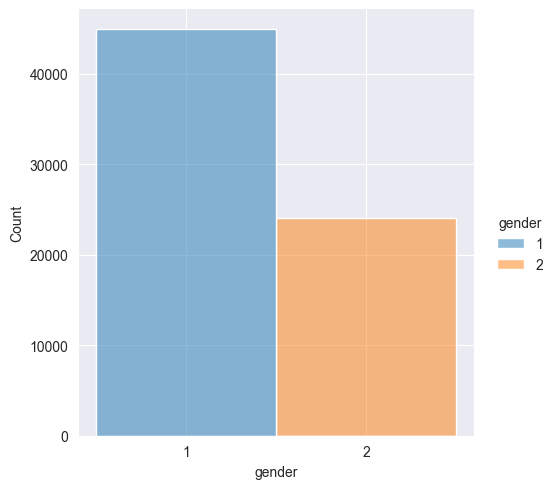

In [16]:
plt.figure(figsize = (8,8))
plot1 = sns.displot(x = "gender",
                    hue = "gender",
                    data = data,)
plot1.set_xlabel = "Gender"
plot1.set_ylabel = "Count"
plt.show()


Now some statistics and more plots

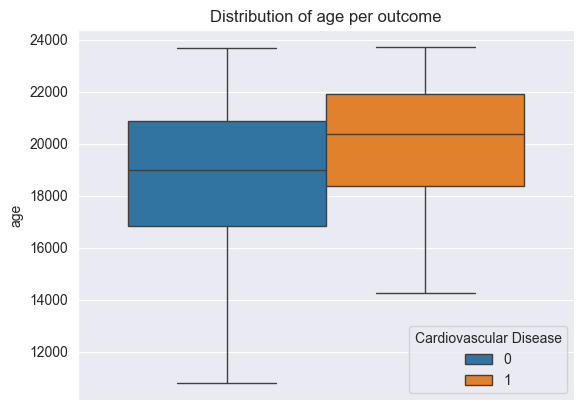

whiu for age : 0.0


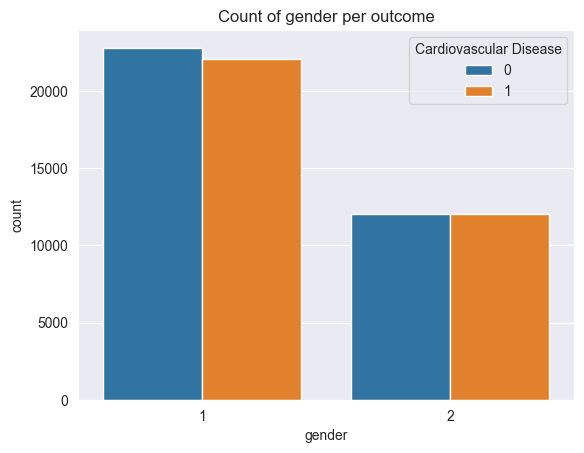

Chi-statistics for gender : 0.05653042376765084


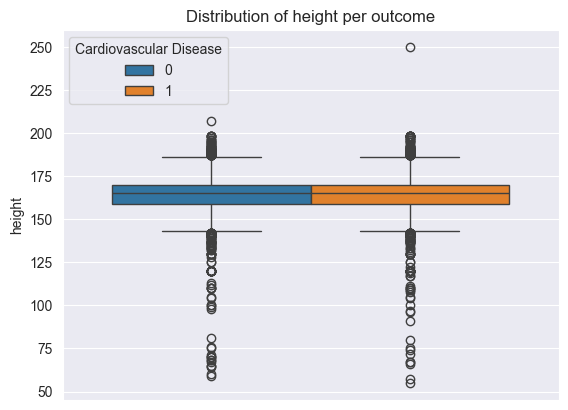

whiu for height : 0.0016008756425573197


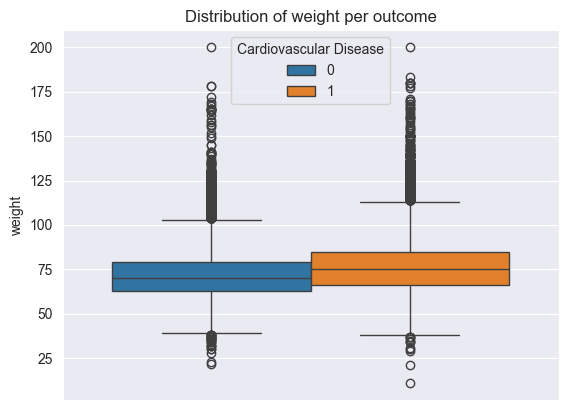

whiu for weight : 0.0


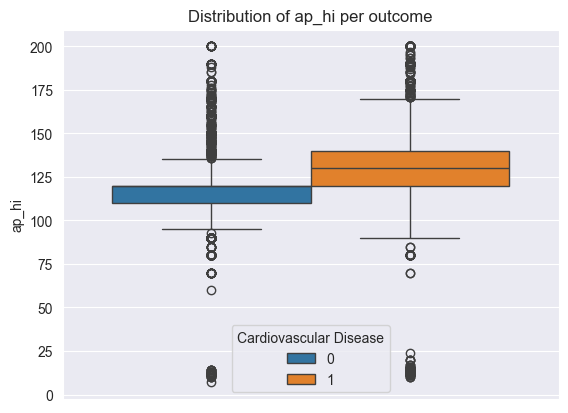

whiu for ap_hi : 0.0


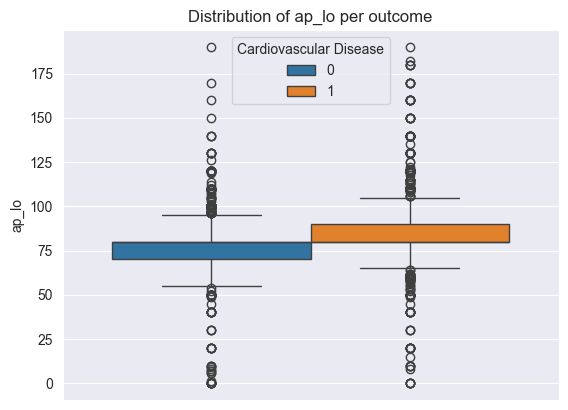

whiu for ap_lo : 0.0


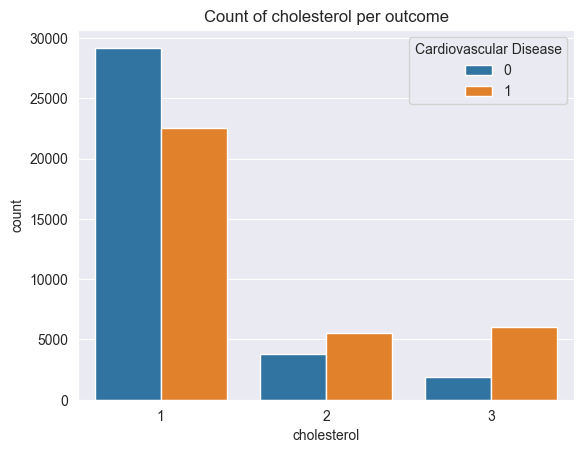

Chi-statistics for cholesterol : 0.0


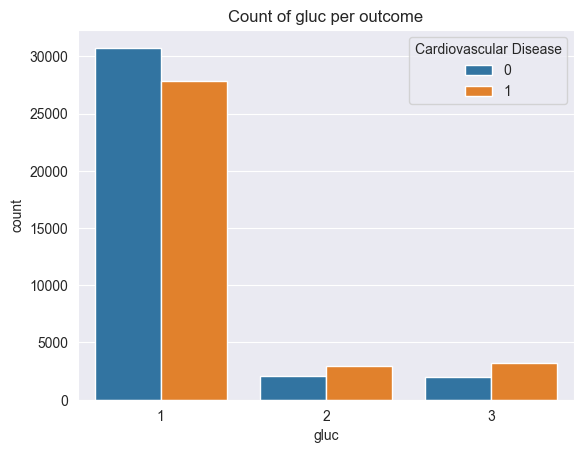

Chi-statistics for gluc : 6.920746087383077e-127


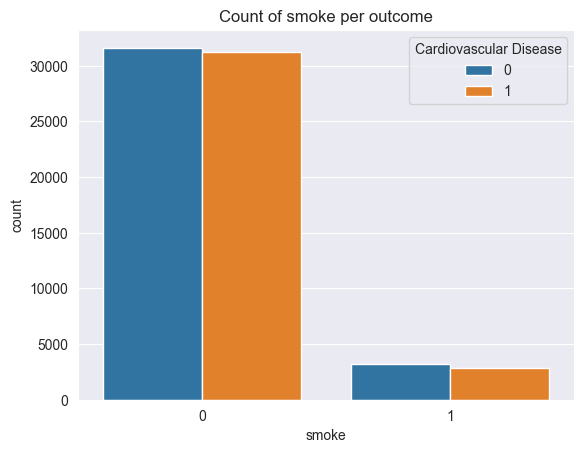

Chi-statistics for smoke : 1.5609310747959953e-05


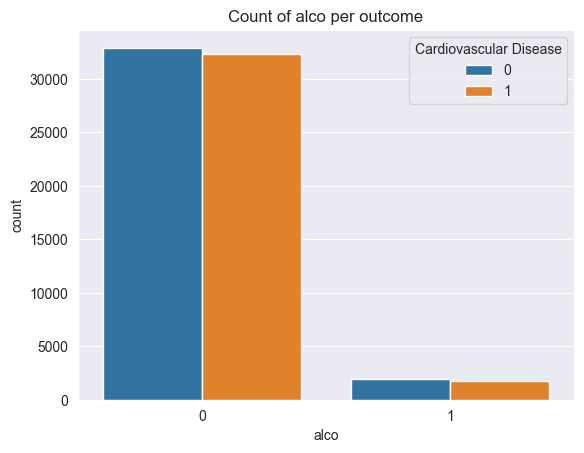

Chi-statistics for alco : 0.03117052581477726


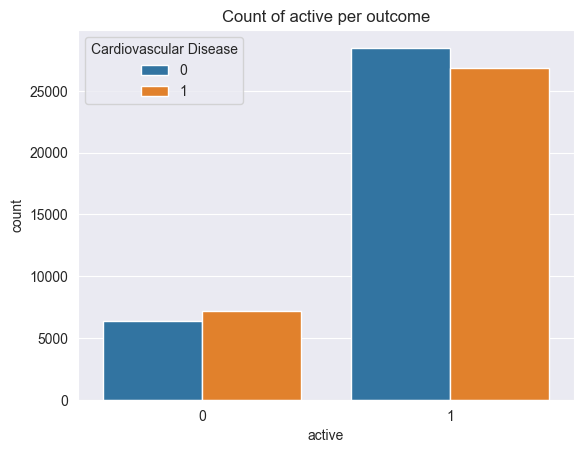

Chi-statistics for active : 1.295438896788674e-22


In [17]:
p_list = []
SIGNIFICANCE_LEVEL = 0.05
for var in data.columns:
    if data[var].dtype == "category" and not var == "cardio":
        plt.figure()
        plot_a = sns.countplot(x = var,
                             hue = "cardio",
                             data = data
        )
        plot_a.set_title(f"Count of {var} per outcome")
        plot_a.legend(title='Cardiovascular Disease')
        
        plt.show()
        
        p = sts.chi2_contingency(pd.crosstab(data[var],data["cardio"]))[1]
        print(f"Chi-statistics for {var} : {p}")
        p_list.append(p)
        
    elif not var == "cardio":
        plt.figure()
        plot_a = sns.boxplot(y = var,
                             hue = "cardio",
                             data = data
        )
        plot_a.set_title(f"Distribution of {var} per outcome")
        plot_a.legend(title='Cardiovascular Disease')
        plt.show()
        group_1 = data[data['cardio'] == "0"][var]
        group_2 = data[data['cardio'] == "1"][var]
        pval_1 = sts.anderson(group_1, dist='norm')
        pval_2 = sts.anderson(group_2, dist="norm")
        stat_1 = pval_1.statistic
        stat_2 = pval_2.statistic
        critical_value_1 = pval_1.critical_values[2]  # 5% significance level
        critical_value_2 = pval_2.critical_values[2]  # 5% significance level


        if stat_1 > critical_value_1 or stat_2 > critical_value_2:
            p = sts.mannwhitneyu(group_1, group_2)[1]
            print(f"whiu for {var} : {p}")
        else:
            p = sts.ttest_ind(group_1, group_2)[1]
            print(f"t-test for {var} : {p}")

        p_list.append(p)

Chatgpts Version ios as follows


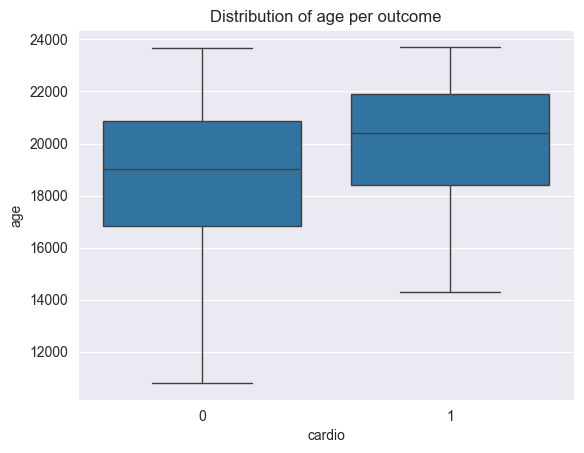

Mann-Whitney U for age: p = 0.00000


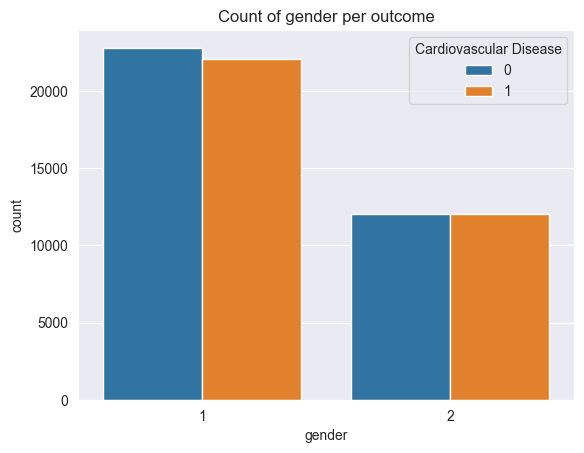

Chi² test for gender: p = 0.05653


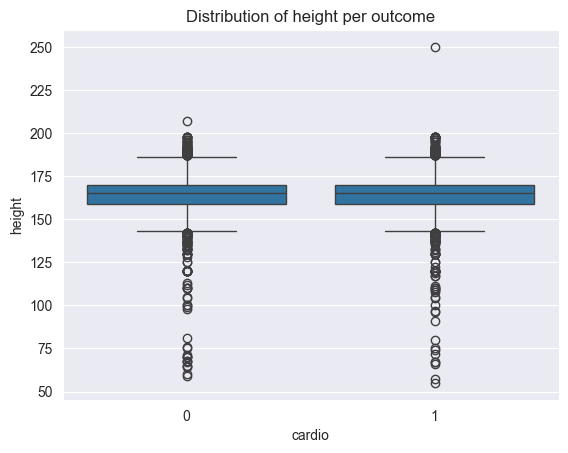

Mann-Whitney U for height: p = 0.00160


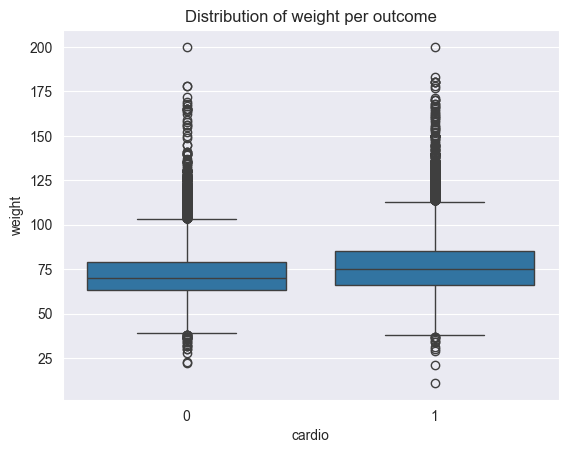

Mann-Whitney U for weight: p = 0.00000


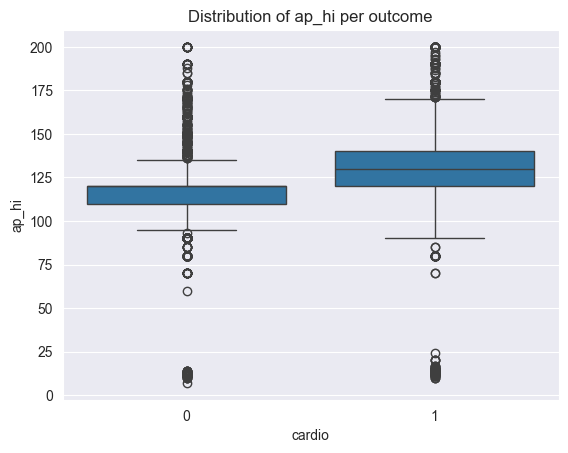

Mann-Whitney U for ap_hi: p = 0.00000


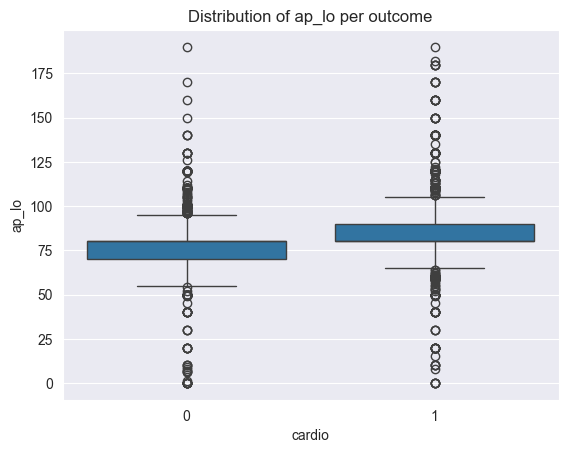

Mann-Whitney U for ap_lo: p = 0.00000


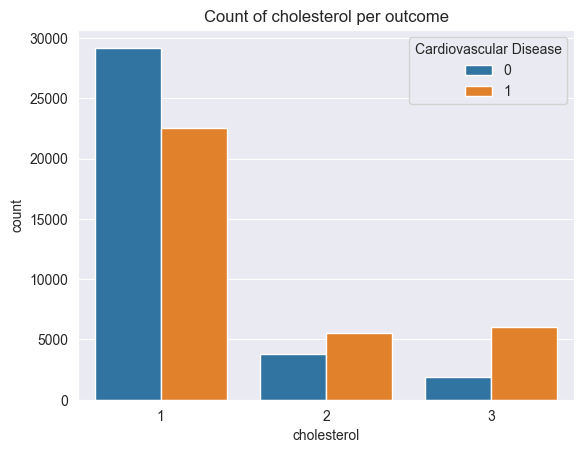

Chi² test for cholesterol: p = 0.00000


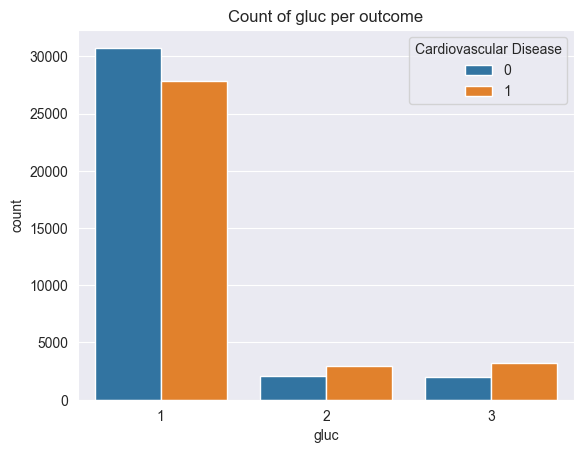

Chi² test for gluc: p = 0.00000


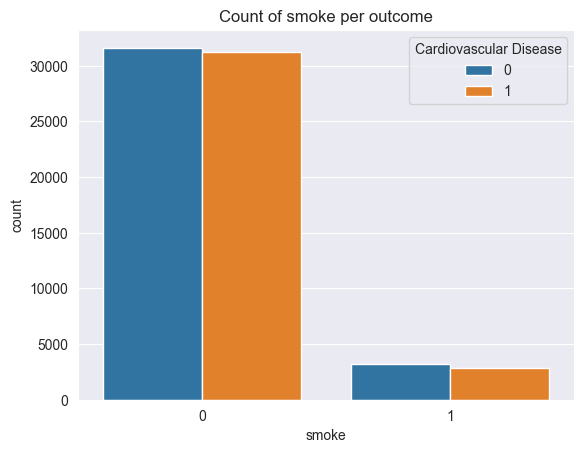

Chi² test for smoke: p = 0.00002


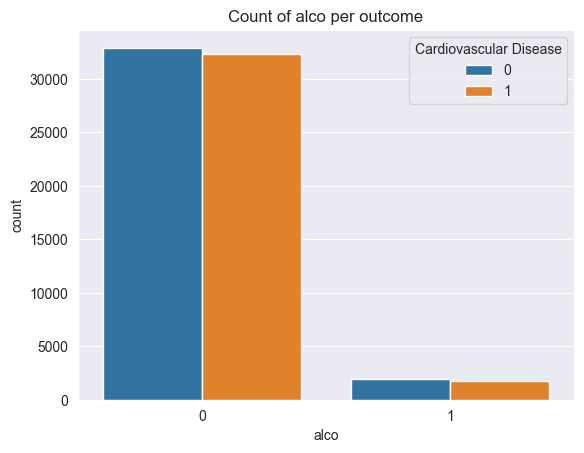

Chi² test for alco: p = 0.03117


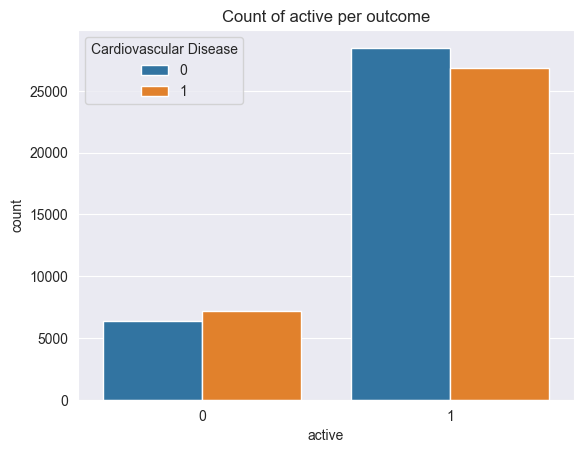

Chi² test for active: p = 0.00000

=== Corrected p-values (Bonferroni) ===
age                  | Mann-Whitney U  | raw p = 0.00000 | corrected p = 0.00000 ✔
gender               | chi2            | raw p = 0.05653 | corrected p = 0.62183 ✘
height               | Mann-Whitney U  | raw p = 0.00160 | corrected p = 0.01761 ✔
weight               | Mann-Whitney U  | raw p = 0.00000 | corrected p = 0.00000 ✔
ap_hi                | Mann-Whitney U  | raw p = 0.00000 | corrected p = 0.00000 ✔
ap_lo                | Mann-Whitney U  | raw p = 0.00000 | corrected p = 0.00000 ✔
cholesterol          | chi2            | raw p = 0.00000 | corrected p = 0.00000 ✔
gluc                 | chi2            | raw p = 0.00000 | corrected p = 0.00000 ✔
smoke                | chi2            | raw p = 0.00002 | corrected p = 0.00017 ✔
alco                 | chi2            | raw p = 0.03117 | corrected p = 0.34288 ✘
active               | chi2            | raw p = 0.00000 | corrected p = 0.00000 ✔


In [18]:
SIGNIFICANCE_LEVEL = 0.05
p_results = []

# Optional: skip plots if running many variables
SHOW_PLOTS = True  

# Ensure target variable is integer (0 or 1)
data["cardio"] = data["cardio"].astype(int)

for var in data.columns:
    if var == "cardio":
        continue
    
    # Drop NA for analysis
    subset = data[[var, "cardio"]].dropna()
    
    if isinstance(subset[var].dtype, pd.CategoricalDtype) or subset[var].dtype == object:
        # --- Categorical Variable ---
        if SHOW_PLOTS:
            plt.figure()
            sns.countplot(x=var, hue="cardio", data=subset)
            plt.title(f"Count of {var} per outcome")
            plt.legend(title="Cardiovascular Disease")
            plt.show()

        contingency = pd.crosstab(subset[var], subset["cardio"])
        chi2, p, _, _ = sts.chi2_contingency(contingency)
        print(f"Chi² test for {var}: p = {p:.5f}")
        p_results.append((var, "chi2", p))

    else:
        # --- Numerical Variable ---
        group_0 = subset[subset["cardio"] == 0][var]
        group_1 = subset[subset["cardio"] == 1][var]

        # Anderson-Darling test for normality
        ad_0 = sts.anderson(group_0, dist='norm')
        ad_1 = sts.anderson(group_1, dist='norm')

        normal_0 = ad_0.statistic < ad_0.critical_values[2]  # 5% threshold
        normal_1 = ad_1.statistic < ad_1.critical_values[2]

        if SHOW_PLOTS:
            plt.figure()
            sns.boxplot(x="cardio", y=var, data=subset)
            plt.title(f"Distribution of {var} per outcome")
            plt.show()

        if normal_0 and normal_1:
            stat, p = sts.ttest_ind(group_0, group_1)
            test_used = "t-test"
        else:
            stat, p = sts.mannwhitneyu(group_0, group_1)
            test_used = "Mann-Whitney U"
        
        print(f"{test_used} for {var}: p = {p:.5f}")
        p_results.append((var, test_used, p))
var_names, tests, raw_pvals = zip(*p_results)
_, corrected_pvals, _, _ = multipletests(raw_pvals, method='bonferroni')  # Or method='fdr_bh'

print("\n=== Corrected p-values (Bonferroni) ===")
for var, test, raw_p, corrected_p in zip(var_names, tests, raw_pvals, corrected_pvals):
    sig = "✔" if corrected_p < SIGNIFICANCE_LEVEL else "✘"
    print(f"{var:20s} | {test:15s} | raw p = {raw_p:.5f} | corrected p = {corrected_p:.5f} {sig}")


In [19]:
print(p_list)
print(data.columns)

[np.float64(0.0), np.float64(0.05653042376765084), np.float64(0.0016008756425573197), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.920746087383077e-127), np.float64(1.5609310747959953e-05), np.float64(0.03117052581477726), np.float64(1.295438896788674e-22)]
Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
...